In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle, islice

In [2]:
class toyData():
    
    def __init__(self, dataset_n=None, random_seed_n=0, n_samples=500, plot=False):
        self.dataset_n = dataset_n
        self.random_seed_n = random_seed_n
        self.n_samples = n_samples
        self.plot = plot
        
    def generate_data(self):
        from sklearn import cluster, datasets, mixture
        np.random.seed(self.random_seed_n)

        # ============
        # Generate datasets. We choose the size big enough to see the scalability
        # of the algorithms, but not too big to avoid too long running times
        # ============
        n_samples = self.n_samples
        noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
        noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
        blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
        no_structure = np.random.rand(n_samples, 2), None

        # Anisotropicly distributed data
        random_state = 170
        X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
        transformation = [[0.6, -0.6], [-0.4, 0.8]]
        X_aniso = np.dot(X, transformation)
        aniso = (X_aniso, y)

        # blobs with varied variances
        varied = datasets.make_blobs(
            n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
        )

        # ============
        # Set up cluster parameters
        # ============
        if self.plot:
            plt.figure(figsize=(9 * 2 + 3, 13))
            plt.subplots_adjust(left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01)

        plot_num = 1

        default_base = {
            "quantile": 0.3,
            "eps": 0.3,
            "damping": 0.9,
            "preference": -200,
            "n_neighbors": 3,
            "n_clusters": 3,
            "min_samples": 7,
            "xi": 0.05,
            "min_cluster_size": 0.1,
        }

        datasets = [
            (
                noisy_circles,
                {
                    "damping": 0.77,
                    "preference": -240,
                    "quantile": 0.2,
                    "n_clusters": 2,
                    "min_samples": 7,
                    "xi": 0.08,
                },
            ),
            (
                noisy_moons,
                {
                    "damping": 0.75,
                    "preference": -220,
                    "n_clusters": 2,
                    "min_samples": 7,
                    "xi": 0.1,
                },
            ),
            (
                varied,
                {
                    "eps": 0.18,
                    "n_neighbors": 2,
                    "min_samples": 7,
                    "xi": 0.01,
                    "min_cluster_size": 0.2,
                },
            ),
            (
                aniso,
                {
                    "eps": 0.15,
                    "n_neighbors": 2,
                    "min_samples": 7,
                    "xi": 0.1,
                    "min_cluster_size": 0.2,
                },
            ),
            (blobs, {"min_samples": 7, "xi": 0.1, "min_cluster_size": 0.2}),
            (no_structure, {}),
        ]
        datasets = [i[0] for i in datasets]
        return datasets
    
    def get_colors(self, y):
        colors = np.array(
                list(
                    islice(
                        cycle(
                            [
                                "#377eb8",
                                "#ff7f00",
                                "#4daf4a",
                                "#f781bf",
                                "#a65628",
                                "#984ea3",
                                "#999999",
                                "#e41a1c",
                                "#dede00",
                            ]
                        ),
                        int(max(y) + 1),
                    )
                )
        )

        return colors
    
    def plot_data(self, X, y):
        colors = self.get_colors(y)
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y])
        plt.xticks(())
        plt.yticks(())
        plt.show()
    
    def main(self):
        # Returns all datasets
        datasets = self.generate_data()
        if self.dataset_n == None:
            X = [x[0] for x in datasets]
            y = [y[1] for y in datasets]
            return (X, y)

        dataset = datasets[self.dataset_n]
        X, y = dataset[0], dataset[1]
        
        if self.plot == True:
            self.plot_data(X, y)
        
        return (X, y)
                

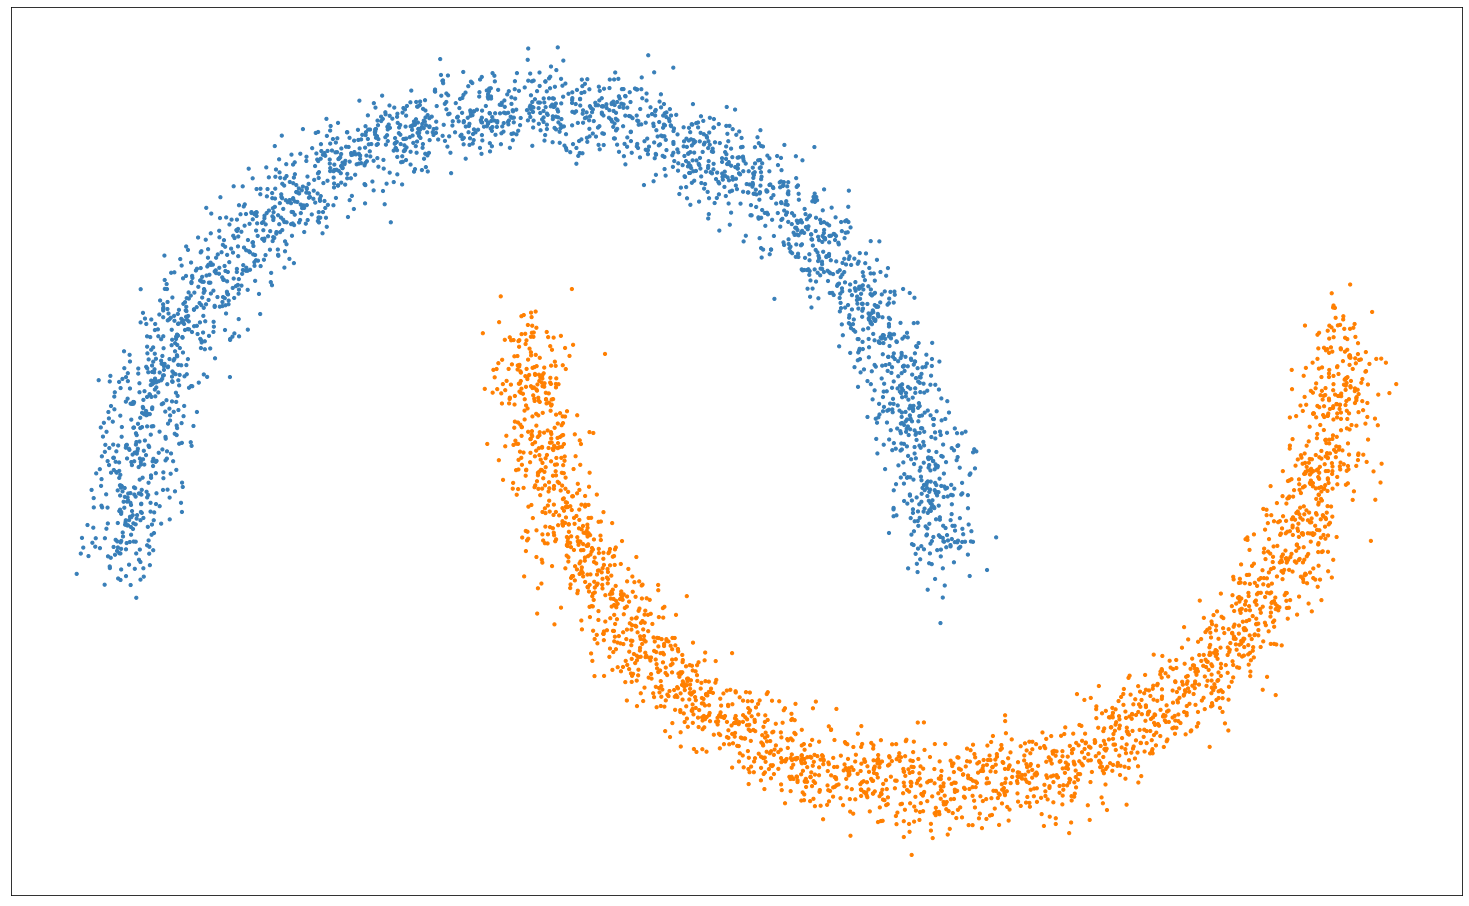

In [88]:
(X, y) = toyData(1, n_samples=5000, plot=True).main()

In [72]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import Precision, Accuracy

In [99]:
class createMultipleNeuralNetworks():
    
    def __init__(self, n_neural_networks=10, input_shape=(500, 2), n_hidden_layers=0, n_categories=2, neuron_number_list = [512], activation_function_list=['relu', 'softmax']):
        self.n_neural_networks = n_neural_networks
        self.input_shape = input_shape
        self.n_hidden_layers = n_hidden_layers
        self.n_categories = n_categories
        self.neuron_number_list = neuron_number_list
        self.activation_function_list = activation_function_list
    
    def add_dense_layer(self, model, input_layer=False):
        # Random number of layers, and activation function
        neuron_number = np.random.choice(self.neuron_number_list)
        print("Number of nuerons: ", neuron_number)
        activation_function = np.random.choice(self.activation_function_list)
        print("Activation Function: ", activation_function)
        
        if input_layer is True:
            model.add(Dense(neuron_number, activation=activation_function, input_shape= self.input_shape))   
        else:
            model.add(Dense(neuron_number, activation=activation_function))   
        
        return model
    
    def generate_model(self):
        model = Sequential()
        
        # Input layer
        model = self.add_dense_layer(model, input_layer=True)
        
        for _ in range(self.n_hidden_layers):
            model = self.add_dense_layer(model)

        # Output layer
        model.add(Dense(self.n_categories, activation="softmax"))
        print('Random neural network architecture summary: ')
        model.summary()
        
        return model 
    
    def save_models(self):
        None
    
    def main(self):
        neural_networks_list = [self.generate_model() for _ in range(self.n_neural_networks)]
        return neural_networks_list
        
        

In [98]:
models = createMultipleNeuralNetworks(n_neural_networks=1000).main()

Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_100 (Dense)           (None, 500, 512)          1536      
                                                                 
 dense_101 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_102 (Dense)           (None, 500, 512)          1536      
                               

                                                                 
 dense_121 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_122 (Dense)           (None, 500, 512)          1536      
                                                                 
 dense_123 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nueron

Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_73"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_142 (Dense)           (None, 500, 512)          1536      
                                                                 
 dense_143 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_144 (Dense)           (None, 500, 512)          1536      
                               

                                                                 
 dense_163 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_84"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_164 (Dense)           (None, 500, 512)          1536      
                                                                 
 dense_165 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nueron

Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_94"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_184 (Dense)           (None, 500, 512)          1536      
                                                                 
 dense_185 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_95"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_186 (Dense)           (None, 500, 512)          1536      
                                  

                                                                 
 dense_205 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_105"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_206 (Dense)           (None, 500, 512)          1536      
                                                                 
 dense_207 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:

Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_115"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_226 (Dense)           (None, 500, 512)          1536      
                                                                 
 dense_227 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_116"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_228 (Dense)           (None, 500, 512)          1536      
                             

                                                                 
 dense_247 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_126"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_248 (Dense)           (None, 500, 512)          1536      
                                                                 
 dense_249 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuero

Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_136"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_268 (Dense)           (None, 500, 512)          1536      
                                                                 
 dense_269 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_137"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_270 (Dense)           (None, 500, 512)          1536      
                             

                                                                 
 dense_289 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_147"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_290 (Dense)           (None, 500, 512)          1536      
                                                                 
 dense_291 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:

Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_157"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_310 (Dense)           (None, 500, 512)          1536      
                                                                 
 dense_311 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_158"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_312 (Dense)           (None, 500, 512)          1536      
                             

                                                                 
 dense_331 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_168"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_332 (Dense)           (None, 500, 512)          1536      
                                                                 
 dense_333 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:

Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_178"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_352 (Dense)           (None, 500, 512)          1536      
                                                                 
 dense_353 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_179"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_354 (Dense)           (None, 500, 512)          1536      
                          

                                                                 
 dense_373 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_189"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_374 (Dense)           (None, 500, 512)          1536      
                                                                 
 dense_375 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuero

Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_199"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_394 (Dense)           (None, 500, 512)          1536      
                                                                 
 dense_395 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_200"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_396 (Dense)           (None, 500, 512)          1536      
                          

                                                                 
 dense_415 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_210"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_416 (Dense)           (None, 500, 512)          1536      
                                                                 
 dense_417 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuero

Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_220"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_436 (Dense)           (None, 500, 512)          1536      
                                                                 
 dense_437 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_221"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_438 (Dense)           (None, 500, 512)          1536      
                          

                                                                 
 dense_457 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_231"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_458 (Dense)           (None, 500, 512)          1536      
                                                                 
 dense_459 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuero

Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_241"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_478 (Dense)           (None, 500, 512)          1536      
                                                                 
 dense_479 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_242"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_480 (Dense)           (None, 500, 512)          1536      
                             

                                                                 
 dense_499 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_252"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_500 (Dense)           (None, 500, 512)          1536      
                                                                 
 dense_501 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuero

Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_262"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_520 (Dense)           (None, 500, 512)          1536      
                                                                 
 dense_521 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_263"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_522 (Dense)           (None, 500, 512)          1536      
                                

                                                                 
 dense_541 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_273"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_542 (Dense)           (None, 500, 512)          1536      
                                                                 
 dense_543 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuero

Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_283"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_562 (Dense)           (None, 500, 512)          1536      
                                                                 
 dense_563 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_284"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_564 (Dense)           (None, 500, 512)          1536      
                          

                                                                 
 dense_583 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_294"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_584 (Dense)           (None, 500, 512)          1536      
                                                                 
 dense_585 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuero

Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_304"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_604 (Dense)           (None, 500, 512)          1536      
                                                                 
 dense_605 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_305"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_606 (Dense)           (None, 500, 512)          1536      
                             

                                                                 
 dense_625 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_315"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_626 (Dense)           (None, 500, 512)          1536      
                                                                 
 dense_627 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuero

Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_325"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_646 (Dense)           (None, 500, 512)          1536      
                                                                 
 dense_647 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_326"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_648 (Dense)           (None, 500, 512)          1536      
                             

                                                                 
 dense_667 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_336"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_668 (Dense)           (None, 500, 512)          1536      
                                                                 
 dense_669 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:

Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_346"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_688 (Dense)           (None, 500, 512)          1536      
                                                                 
 dense_689 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_347"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_690 (Dense)           (None, 500, 512)          1536      
                             

                                                                 
 dense_709 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_357"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_710 (Dense)           (None, 500, 512)          1536      
                                                                 
 dense_711 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuero

Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_367"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_730 (Dense)           (None, 500, 512)          1536      
                                                                 
 dense_731 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_368"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_732 (Dense)           (None, 500, 512)          1536      
                             

                                                                 
 dense_751 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_378"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_752 (Dense)           (None, 500, 512)          1536      
                                                                 
 dense_753 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:

Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_388"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_772 (Dense)           (None, 500, 512)          1536      
                                                                 
 dense_773 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_389"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_774 (Dense)           (None, 500, 512)          1536      
                          

                                                                 
 dense_793 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_399"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_794 (Dense)           (None, 500, 512)          1536      
                                                                 
 dense_795 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:

Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_409"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_814 (Dense)           (None, 500, 512)          1536      
                                                                 
 dense_815 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_410"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_816 (Dense)           (None, 500, 512)          1536      
                             

                                                                 
 dense_835 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_420"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_836 (Dense)           (None, 500, 512)          1536      
                                                                 
 dense_837 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuero

Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_430"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_856 (Dense)           (None, 500, 512)          1536      
                                                                 
 dense_857 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_431"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_858 (Dense)           (None, 500, 512)          1536      
                          

                                                                 
 dense_877 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_441"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_878 (Dense)           (None, 500, 512)          1536      
                                                                 
 dense_879 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuero

Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_451"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_898 (Dense)           (None, 500, 512)          1536      
                                                                 
 dense_899 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_452"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_900 (Dense)           (None, 500, 512)          1536      
                             

                                                                 
 dense_919 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_462"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_920 (Dense)           (None, 500, 512)          1536      
                                                                 
 dense_921 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuero

Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_472"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_940 (Dense)           (None, 500, 512)          1536      
                                                                 
 dense_941 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_473"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_942 (Dense)           (None, 500, 512)          1536      
                          

                                                                 
 dense_961 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_483"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_962 (Dense)           (None, 500, 512)          1536      
                                                                 
 dense_963 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuero

Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_493"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_982 (Dense)           (None, 500, 512)          1536      
                                                                 
 dense_983 (Dense)           (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_494"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_984 (Dense)           (None, 500, 512)          1536      
                             

                                                                 
 dense_1003 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_504"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1004 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1005 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuero

Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_514"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1024 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1025 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_515"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1026 (Dense)          (None, 500, 512)          1536      
                          

                                                                 
 dense_1045 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_525"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1046 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1047 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:

Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_535"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1066 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1067 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_536"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1068 (Dense)          (None, 500, 512)          1536      
                             

                                                                 
 dense_1087 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_546"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1088 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1089 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuero

Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_556"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1108 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1109 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_557"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1110 (Dense)          (None, 500, 512)          1536      
                             

                                                                 
 dense_1129 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_567"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1130 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1131 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:

Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_577"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1150 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1151 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_578"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1152 (Dense)          (None, 500, 512)          1536      
                             

                                                                 
 dense_1171 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_588"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1172 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1173 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuero

Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_598"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1192 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1193 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_599"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1194 (Dense)          (None, 500, 512)          1536      
                                

                                                                 
 dense_1213 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_609"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1214 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1215 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:

Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_619"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1234 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1235 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_620"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1236 (Dense)          (None, 500, 512)          1536      
                          

                                                                 
 dense_1255 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_630"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1256 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1257 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuero

Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_640"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1276 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1277 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_641"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1278 (Dense)          (None, 500, 512)          1536      
                             

                                                                 
 dense_1297 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_651"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1298 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1299 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:

Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_661"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1318 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1319 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_662"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1320 (Dense)          (None, 500, 512)          1536      
                             

                                                                 
 dense_1339 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_672"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1340 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1341 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuero

Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_682"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1360 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1361 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_683"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1362 (Dense)          (None, 500, 512)          1536      
                             

                                                                 
 dense_1381 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_693"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1382 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1383 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuero

Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_703"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1402 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1403 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_704"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1404 (Dense)          (None, 500, 512)          1536      
                             

                                                                 
 dense_1423 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_714"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1424 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1425 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:

Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_724"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1444 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1445 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_725"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1446 (Dense)          (None, 500, 512)          1536      
                          

                                                                 
 dense_1465 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_735"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1466 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1467 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuero

Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_745"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1486 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1487 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_746"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1488 (Dense)          (None, 500, 512)          1536      
                             

                                                                 
 dense_1507 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_756"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1508 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1509 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuero

Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_766"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1528 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1529 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_767"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1530 (Dense)          (None, 500, 512)          1536      
                          

                                                                 
 dense_1549 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_777"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1550 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1551 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:

Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_787"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1570 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1571 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_788"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1572 (Dense)          (None, 500, 512)          1536      
                                

                                                                 
 dense_1591 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_798"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1592 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1593 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuero

Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_808"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1612 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1613 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_809"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1614 (Dense)          (None, 500, 512)          1536      
                          

                                                                 
 dense_1633 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_819"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1634 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1635 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuero

Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_829"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1654 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1655 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_830"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1656 (Dense)          (None, 500, 512)          1536      
                          

                                                                 
 dense_1675 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_840"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1676 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1677 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:

Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_850"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1696 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1697 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_851"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1698 (Dense)          (None, 500, 512)          1536      
                             

                                                                 
 dense_1717 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_861"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1718 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1719 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:

Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_871"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1738 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1739 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_872"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1740 (Dense)          (None, 500, 512)          1536      
                          

                                                                 
 dense_1759 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_882"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1760 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1761 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuero

Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_892"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1780 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1781 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_893"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1782 (Dense)          (None, 500, 512)          1536      
                             

                                                                 
 dense_1801 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_903"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1802 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1803 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:

Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_913"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1822 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1823 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_914"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1824 (Dense)          (None, 500, 512)          1536      
                          

                                                                 
 dense_1843 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_924"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1844 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1845 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:

Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_934"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1864 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1865 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_935"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1866 (Dense)          (None, 500, 512)          1536      
                                

                                                                 
 dense_1885 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_945"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1886 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1887 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuero

Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_955"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1906 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1907 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_956"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1908 (Dense)          (None, 500, 512)          1536      
                             

                                                                 
 dense_1927 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_966"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1928 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1929 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuero

Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_976"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1948 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1949 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_977"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1950 (Dense)          (None, 500, 512)          1536      
                          

                                                                 
 dense_1969 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_987"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1970 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1971 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:

Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_997"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1990 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_1991 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_998"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1992 (Dense)          (None, 500, 512)          1536      
                                

                                                                 
 dense_2011 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_1008"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2012 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_2013 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons

Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_1018"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2032 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_2033 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_1019"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2034 (Dense)          (None, 500, 512)          1536      
                              

                                                                 
 dense_2053 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_1029"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2054 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_2055 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuer

Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_1039"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2074 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_2075 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_1040"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2076 (Dense)          (None, 500, 512)          1536      
                        

                                                                 
 dense_2095 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_1050"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2096 (Dense)          (None, 500, 512)          1536      
                                                                 
 dense_2097 (Dense)          (None, 500, 2)            1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuer